In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
data= pd.read_csv('/content/drive/MyDrive/dataset/Uni_linear.txt' , header=None)
data.head()

,0,1
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [2]:
data.describe()

,0,1
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


Text(0.5, 1.0, 'Profit Prediction')

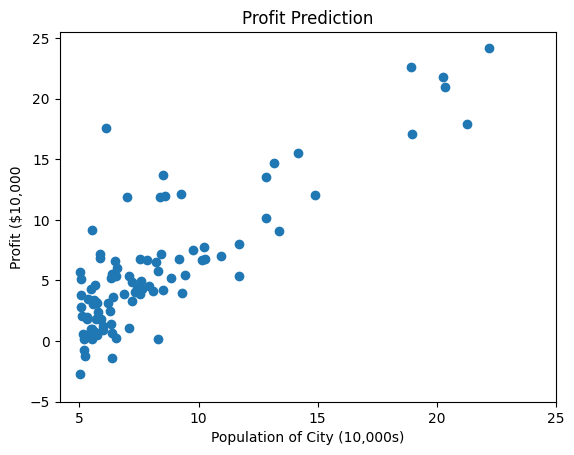

In [3]:
#data plot

plt.scatter(data[0],data[1])
plt.xticks(np.arange(5,30,step=5))
plt.yticks(np.arange(-5,30,step=5))
plt.xlabel("Population of City (10,000s)")
plt.ylabel("Profit ($10,000")
plt.title("Profit Prediction")

In [4]:
#compute cost function

def computeCost(X,y,theta):
    m=len(y)
    predictions=X.dot(theta)
    square_err=(predictions - y)**2

    return 1/(2*m) * np.sum(square_err)

data_n=data.values
m=data_n[:,0].size
X=np.append(np.ones((m,1)),data_n[:,0].reshape(m,1),axis=1)
y=data_n[:,1].reshape(m,1)
theta=np.zeros((2,1))

computeCost(X,y,theta)

32.072733877455676

In [5]:
#gradient descent

def gradientDescent(X,y,theta,alpha,num_iters):
    m=len(y)
    J_history=[]

    for i in range(num_iters):
        predictions = X.dot(theta)
        error = np.dot(X.transpose(),(predictions -y))
        descent=alpha * 1/m * error
        theta-=descent
        J_history.append(computeCost(X,y,theta))

    return theta, J_history

h(x) =-3.63 + 1.17x1


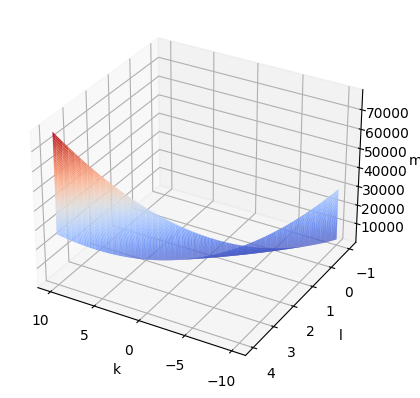

In [6]:
theta,J_history = gradientDescent(X,y,theta,0.01,1500)
print("h(x) ="+str(round(theta[0,0],2))+" + "+str(round(theta[1,0],2))+"x1")
from mpl_toolkits.mplot3d import Axes3D
theta0_vals=np.linspace(-10,10,100)
theta1_vals=np.linspace(-1,4,100)
J_vals=np.zeros((len(theta0_vals),len(theta1_vals)))

for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        t=np.array([theta0_vals[i],theta1_vals[j]])
        J_vals[i,j]=computeCost(X,y,t)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf=ax.plot_surface(theta0_vals,theta1_vals,J_vals,cmap="coolwarm")

ax.set_xlabel("k",fontsize=10)
ax.set_ylabel("l",fontsize=10)
ax.set_zlabel("m",fontsize=10)

ax.view_init(30,120)


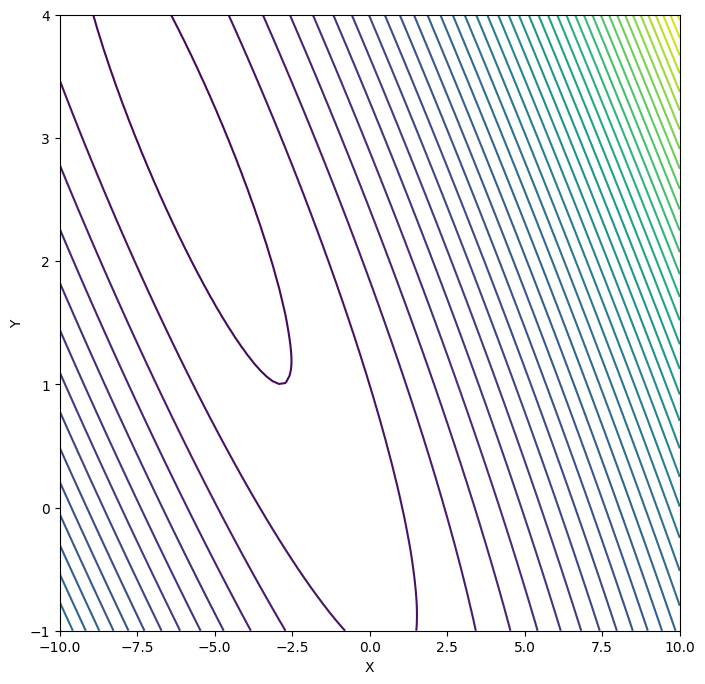

In [7]:
fig, ax = plt.subplots(figsize=(8, 8))
contour = ax.contour(theta0_vals,theta1_vals,J_vals, levels=50)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()